# Import necessary functions

In [66]:
import tensorflow as tf
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop



# Extract data from dataset

In [67]:
fldr="./UTKFace"

In [68]:
import os
flies=os.listdir(fldr)

# Add data to the file

In [69]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

# Plot age and gender of the image

In [70]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

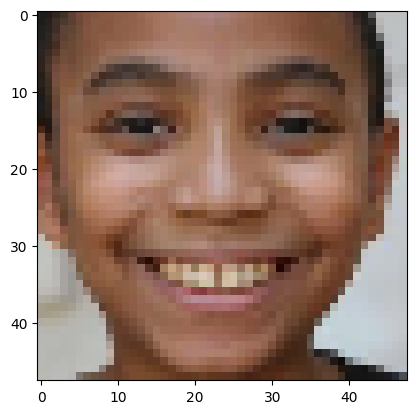

In [71]:
plt.imshow(images[87])

In [72]:
print(ages[87])

10


In [73]:
print(genders[87])

0


# Get images array, ages array, genders array

In [74]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [75]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)


# Count the values of gender only

In [76]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


# Plot gender values

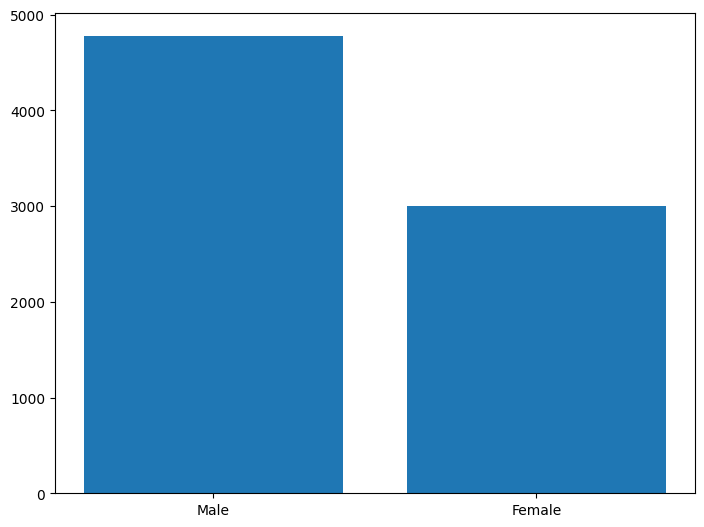

In [77]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[4775,2996]
ax.bar(gender,values)
plt.show()


# Count the age values only

In [78]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# Convert array to list

In [79]:
val=values.tolist()
cnt=counts.tolist()

# Plot age values

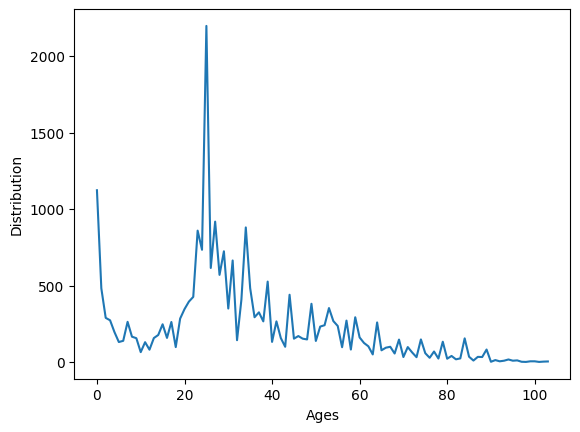

In [80]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [81]:
len(gender)

2

# Lable the age and gender

In [82]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1
    

In [83]:
images_f_2=images_f/255


In [84]:
images_f_2.shape

(23708, 48, 48, 3)

In [85]:
labels_f=np.array(labels)

# Get the values to Train and Test

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [88]:
Y_train[0:5]

array([[26,  0],
       [84,  1],
       [31,  1],
       [23,  1],
       [34,  0]])

# Do Y_train and Y_test

In [89]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [90]:
Y_train_2[0][0:5]

array([0, 1, 1, 1, 0])

In [91]:
Y_train_2[1][0:5]

array([26, 84, 31, 23, 34])

In [92]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

# Define the Model

In [93]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [94]:
Model=model((48,48,3))

In [95]:
Model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 48, 48, 32)           896       ['input_3[0][0]']             
                                                                                                  
 dropout_12 (Dropout)        (None, 48, 48, 32)           0         ['conv2d_8[0][0]']            
                                                                                                  
 activation_8 (Activation)   (None, 48, 48, 32)           0         ['dropout_12[0][0]']          
                                                                                            

# Train and test the model 

In [96]:
from tensorflow.keras.callbacks import ModelCheckpoint
fle_s='Age_sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]


In [97]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=150,callbacks=callback_list)

Epoch 1/150
278/278 [==============================] - ETA: 0s - loss: 16.6747 - sex_out_loss: 0.6861 - age_out_loss: 15.8021 - sex_out_accuracy: 0.5903 - age_out_accuracy: 0.0458
Epoch 1: val_loss improved from inf to 14.50074, saving model to Age_sex_Detection.h5
278/278 [==============================] - 88s 303ms/step - loss: 16.6747 - sex_out_loss: 0.6861 - age_out_loss: 15.8021 - sex_out_accuracy: 0.5903 - age_out_accuracy: 0.0458 - val_loss: 14.5007 - val_sex_out_loss: 0.6426 - val_age_out_loss: 13.6857 - val_sex_out_accuracy: 0.6084 - val_age_out_accuracy: 0.0516
Epoch 2/150
278/278 [==============================] - ETA: 0s - loss: 13.1474 - sex_out_loss: 0.5538 - age_out_loss: 12.3888 - sex_out_accuracy: 0.7167 - age_out_accuracy: 0.0420
Epoch 2: val_loss improved from 14.50074 to 11.48219, saving model to Age_sex_Detection.h5
278/278 [==============================] - 79s 283ms/step - loss: 13.1474 - sex_out_loss: 0.5538 - age_out_loss: 12.3888 - sex_out_accuracy: 0.7167 - a

# Evaluate the test model

In [98]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 4s 23ms/step - loss: 7.5115 - sex_out_loss: 0.2733 - age_out_loss: 6.3506 - sex_out_accuracy: 0.8812 - age_out_accuracy: 0.0516


[7.51152229309082,
 0.2732733190059662,
 6.350637912750244,
 0.8812215328216553,
 0.05162814259529114]

In [99]:
pred=Model.predict(X_test)
pred[1]

186/186 [==============================] - 5s 23ms/step


array([[45.29152 ],
       [37.28938 ],
       [26.082676],
       ...,
       [10.960576],
       [39.0879  ],
       [21.02882 ]], dtype=float32)

# Plotting the model loss 

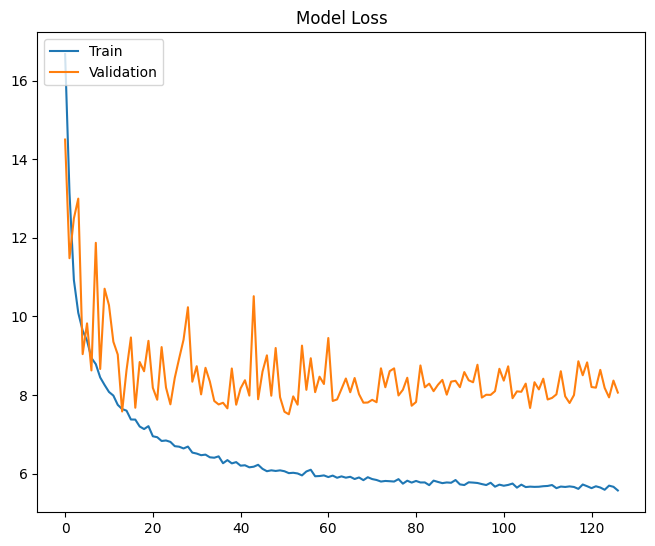

In [100]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting the model accuracy

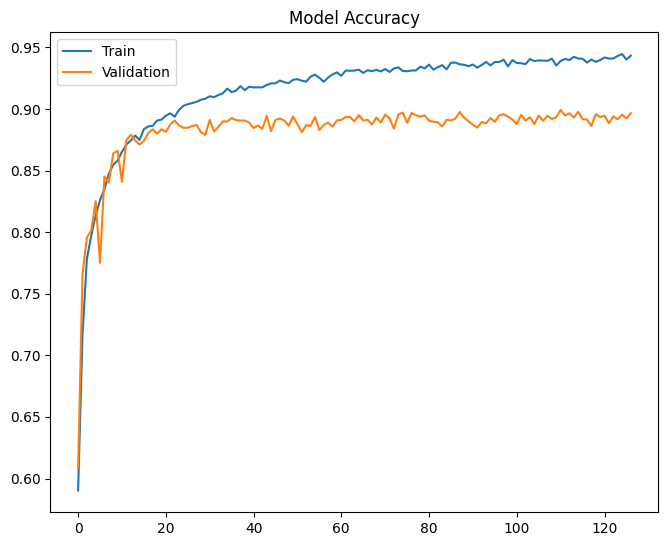

In [101]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting the age tested

<function matplotlib.pyplot.show(close=None, block=None)>

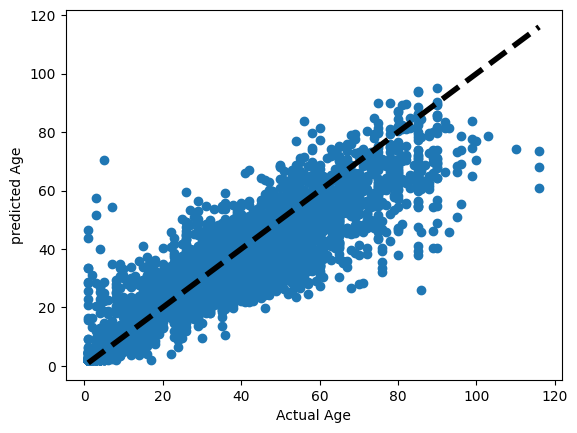

In [102]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('predicted Age')
plt.show

In [103]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1


In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [105]:
report=classification_report(Y_test_2[0],Pred_l)

# Reporting the test model

In [106]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3100
           1       0.84      0.92      0.88      2827

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [107]:
results=confusion_matrix(Y_test_2[0],Pred_l)

# Making heatmap for images

<Axes: >

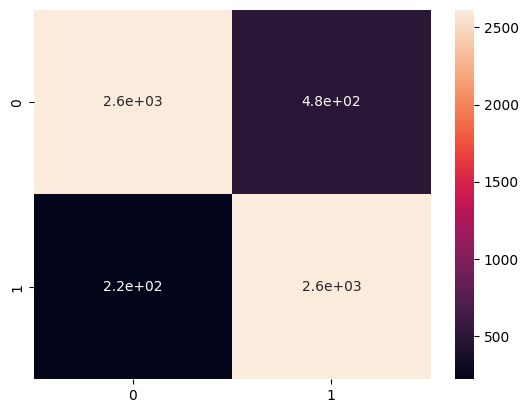

In [108]:
import seaborn as sns
sns.heatmap(results,annot=True)

# Testing the image

In [109]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    Pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(Pred_l[1][0]))
    sex=int(np.round(Pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("predicted Gender is "+ sex_f[sex])

# Test 1

1/1 [==============================] - 0s 30ms/step
Predicted Age is 94
predicted Gender is Female


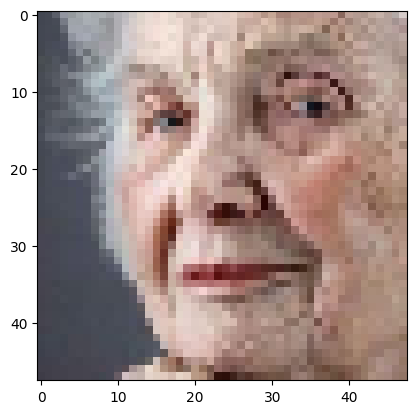

In [110]:
test_image(4,images_f,images_f_2,Model)

Test 2

1/1 [==============================] - 0s 32ms/step
Predicted Age is 8
predicted Gender is Male


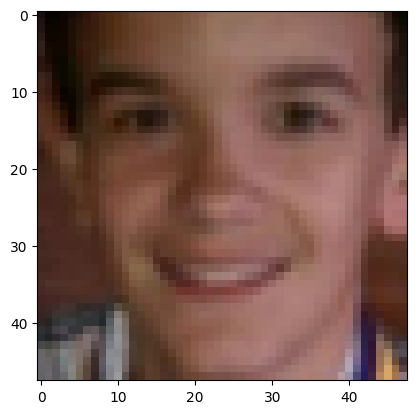

In [111]:
test_image(23,images_f,images_f_2,Model)

Test 3

1/1 [==============================] - 0s 28ms/step
Predicted Age is 12
predicted Gender is Female


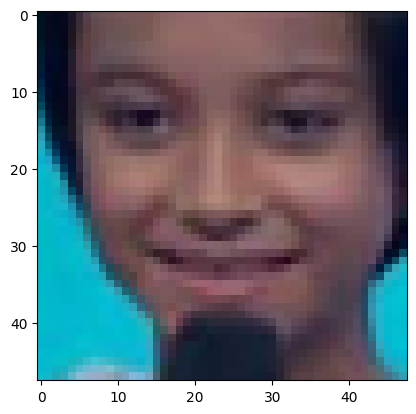

In [112]:
test_image(168,images_f,images_f_2,Model)

Test 4

1/1 [==============================] - 0s 28ms/step
Predicted Age is 27
predicted Gender is Male


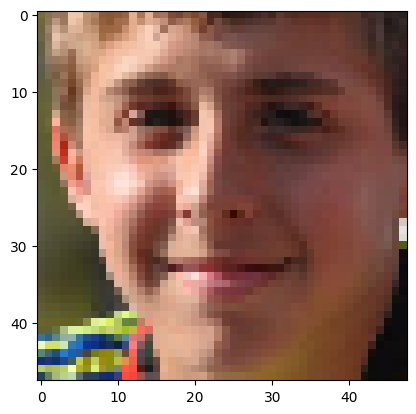

In [113]:
test_image(888,images_f,images_f_2,Model)

Test 5

1/1 [==============================] - 0s 38ms/step
Predicted Age is 16
predicted Gender is Female


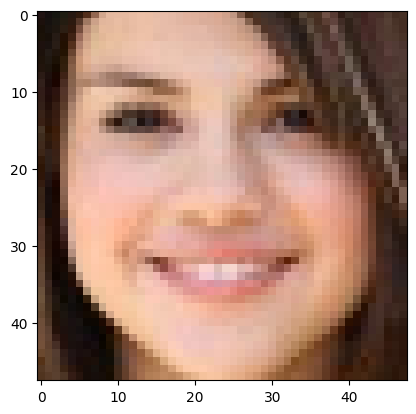

In [114]:
test_image(567,images_f,images_f_2,Model)

Test 6

1/1 [==============================] - 0s 38ms/step
Predicted Age is 19
predicted Gender is Female


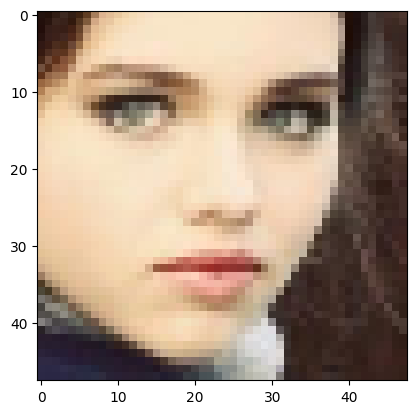

In [115]:
test_image(743,images_f,images_f_2,Model)